# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [1]:
import pandas as pd
import numpy as np

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [2]:
# Загружаем треки
tracks = pd.read_parquet('tracks.parquet')
tracks.head(5)

,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]


In [3]:
# Загружаем каталог имен и названий
catalog_names = pd.read_parquet('catalog_names.parquet')
catalog_names.head(5)

,id,type,name
0,3,album,Taller Children
1,12,album,Wild Young Hearts
2,13,album,Lonesome Crow
3,17,album,Graffiti Soul
4,26,album,Blues Six Pack


In [4]:
# Загружаем данные о пользовательских действиях
interactions = pd.read_parquet('interactions.parquet')
interactions.head(5)

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22


# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [5]:
## Обзор каталога треков

# Общая информация о данных
print(f"\nИсходный размер данных: {tracks.shape}")
print("Общая информация о данных:")
print(tracks.info())
print("\nПервые 5 строк данных:")
display(tracks.head())

# Обзор типов данных
print("\nТипы данных столбцов:")
print(tracks.dtypes)

# Проверка на пропущенные или пустые значения
print("\nПроверка на пропущенные или пустые значения:")
print("Пропущенные значения (None/NaN):")
print(tracks.isna().sum())

# Проверка на дубликаты track_id
duplicates = tracks['track_id'].duplicated().sum()
print(f"Количество дублирующихся track_id: {duplicates}")

# Преобразуем списки в кортежи (чтобы их можно было хэшировать и сравнивать)
tracks["albums_tuple"]  = tracks["albums"].apply(lambda x: tuple(sorted(x)))
tracks["artists_tuple"] = tracks["artists"].apply(lambda x: tuple(sorted(x)))
tracks["genres_tuple"]  = tracks["genres"].apply(lambda x: tuple(sorted(x)))

# создаём ключ-дубликатор
tracks["dup_key"] = tracks[["albums_tuple","artists_tuple","genres_tuple"]].apply(tuple, axis=1)

# ищем дубликаты
dup_counts = tracks["dup_key"].duplicated(keep=False)   # все строки, у кого есть дубли
duplicates = tracks[dup_counts].sort_values("dup_key")

print(f"Всего потенциальных дублей: {duplicates.shape[0]}")
display(duplicates.head(20))

# Удаляем вспомогательные поля
tracks.drop(columns=["albums_tuple", "artists_tuple", "genres_tuple"], inplace=True)

# Переиндексируем
tracks.reset_index(drop=True, inplace=True)

# фильтруем catalog_names только по трекам
catalog_tracks = catalog_names[catalog_names["type"] == "track"][["id", "name"]]

# делаем left join по track_id
tracks_with_names = tracks.merge(
    catalog_tracks, 
    how="left", 
    left_on="track_id", 
    right_on="id"
)

# проверяем наличие треков в catalog_names
missing_names = tracks_with_names["name"].isna().sum()
print(f"Треки отсутствующие catalog_names: {missing_names}")


Исходный размер данных: (1000000, 4)
Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB
None

Первые 5 строк данных:


,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]



Типы данных столбцов:
track_id     int64
albums      object
artists     object
genres      object
dtype: object

Проверка на пропущенные или пустые значения:
Пропущенные значения (None/NaN):
track_id    0
albums      0
artists     0
genres      0
dtype: int64
Количество дублирующихся track_id: 0
Всего потенциальных дублей: 538646


,track_id,albums,artists,genres,albums_tuple,artists_tuple,genres_tuple,dup_key
503277,34828749,[],[],[],(),(),(),"((), (), ())"
415644,28530632,[],[],[],(),(),(),"((), (), ())"
326607,21196118,[],[],[],(),(),(),"((), (), ())"
527490,36598340,[],[],[],(),(),(),"((), (), ())"
326606,21196117,[],[],[],(),(),(),"((), (), ())"
326605,21196116,[],[],[],(),(),(),"((), (), ())"
326600,21196111,[],[],[],(),(),(),"((), (), ())"
326598,21196109,[],[],[],(),(),(),"((), (), ())"
326596,21196107,[],[],[],(),(),(),"((), (), ())"
326594,21196105,[],[],[],(),(),(),"((), (), ())"


Треки отсутствующие catalog_names: 0


### Итоги анализа `tracks.parquet`

1. **Размер датасета**

   * 1000000 строк, 4 колонки (`track_id`, `albums`, `artists`, `genres`).
  
2. **Типы и структура данных**

   * `track_id` - `int64`, уникален (дубликатов `track_id` нет).
   * `albums`, `artists`, `genres` — списки ID, что не очень удобно для анализа, лучше их **развернуть (explode)** в отдельные строки

5. **Пустые значения в списках**

   * В данных встречаются треки с пустыми списками (`[]`) для альбомов, артистов и жанров.
   * Нужно удалить такие треки т.к. они могут негативно влиять при расчетах рекомендаций

6. **Проверка дублей**

   * По `track_id` дубликатов нет.
   * Но если проверять по комбинации `(albums + artists + genres)`, то дублей более 500к.
   * Сюда же попали строки с полностью пустыми атрибутами: `(albums=[], artists=[], genres=[])`.
   * Нужно очистить данные от дубликатов

7. **Проверка наличия в catalog_names**

   * Все треки присутствуют в catalog_names

---

### Выводы

* Требуется очистка данных от пустых и дублирующихся значений
* Для удобства работы с данными нужно преобразовать `albums`, `artists`, `genres` в отдельные строки


### Очистка от дублей

In [6]:
import ast

def _to_seq(x):
    """Превращает x в список значений"""
    if x is None:
        return []
    if isinstance(x, float) and np.isnan(x):
        return []
    if isinstance(x, (list, tuple)):
        return list(x)
    if isinstance(x, np.ndarray):
        return x.tolist()
    if isinstance(x, str):
        s = x.strip()
        if s in ("[]", "()"):
            return []
        if (s.startswith("[") and s.endswith("]")) or (s.startswith("(") and s.endswith(")")):
            try:
                v = ast.literal_eval(s)
                if isinstance(v, (list, tuple)):
                    return list(v)
            except Exception:
                return [s]
        return [s]
    # На всякий случай
    try:
        return list(x)
    except Exception:
        return [x]

def _dedup_key(values, order_matters=False, cast_int=True):
    """Создает ключ для дедупликации"""
    seq = _to_seq(values)
    if cast_int:
        norm = []
        for v in seq:
            try:
                norm.append(int(v))
            except Exception:
                norm.append(v)
        seq = norm

    if order_matters:
        return tuple(seq)
    try:
        return tuple(sorted(set(seq)))
    except TypeError:
        return tuple(sorted(set(seq), key=lambda z: str(z)))

def clean_tracks_df(
    df: pd.DataFrame,
    order_matters_for=("albums",),
    drop_if_any_empty=True
) -> pd.DataFrame:
    required_cols = ["track_id", "albums", "artists", "genres"]
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Нет колонок: {missing}")

    n0 = len(df)

    # удаляем строки с пустыми атрибутами
    if drop_if_any_empty:
        non_empty_mask = (
            pd.Series(df["albums"].map(lambda x: len(_to_seq(x)) > 0), index=df.index)
            & pd.Series(df["artists"].map(lambda x: len(_to_seq(x)) > 0), index=df.index)
            & pd.Series(df["genres"].map(lambda x: len(_to_seq(x)) > 0), index=df.index)
        )
        df1 = df.loc[non_empty_mask].copy()
    else:
        df1 = df.copy()

    n_after_nonempty = len(df1)

    # Создаем ключи для дедупликации
    for col in ["albums", "artists", "genres"]:
        df1[f"{col}_key"] = df1[col].map(
            lambda x: _dedup_key(x, order_matters=(col in order_matters_for))
        )

    n_before_dedup = len(df1)
    df2 = df1.drop_duplicates(subset=["albums_key", "artists_key", "genres_key"], keep="first").copy()
    n_after_dedup = len(df2)

    # Переиндексипуем
    df2.reset_index(drop=True, inplace=True)

    print("===== Очистка треков =====")
    print(f"Строк исходно:                  {n0:,}")
    print(f"После удаления пустых:          {n_after_nonempty:,}  (-{n0 - n_after_nonempty:,})")
    print(f"До дедупликации:                {n_before_dedup:,}")
    print(f"После дедупликации:             {n_after_dedup:,}  (-{n_before_dedup - n_after_dedup:,})")
    # Сколько осталось дублей без учета порядка
    dups_left = df2.duplicated(subset=["albums_key", "artists_key", "genres_key"]).sum()
    print(f"Оставшихся дублей по ключам:    {int(dups_left):,}")
    print("===============================================")

    # Удаляем вспомогательные поля
    df2.drop(columns=["dup_key", "albums_key", "artists_key", "genres_key"], inplace=True)

    return df2

tracks_clean = clean_tracks_df(tracks)
display(tracks_clean.head(20))

===== Очистка треков =====
Строк исходно:                  1,000,000
После удаления пустых:          980,977  (-19,023)
До дедупликации:                980,977
После дедупликации:             554,951  (-426,026)
Оставшихся дублей по ключам:    0


,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,135,"[12, 214, 2490809]",[84],[11]
2,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]
3,141,"[12, 214, 60093, 2490809, 10023160, 15635235, ...",[84],[11]
4,144,"[13, 99422]",[90],"[59, 102]"
5,148,"[13, 89431, 99422]",[90],"[59, 102]"
6,151,"[13, 99422, 5912223]",[90],"[59, 102]"
7,220,"[17, 49, 3671540, 5971368]",[183],"[14, 102]"
8,223,"[17, 49, 1597558, 1597602, 3671540, 5971368, 9...",[183],"[11, 14, 102]"
9,321,"[26, 1583, 1687, 85704, 87620, 87673, 2486936,...",[2785081],[33]


In [7]:
## Обзор датасета каталога имен и названий

# Общая информация о данных
print(f"\nИсходный размер данных: {catalog_names.shape}")
print("\nОбщая информация о данных:")
print(catalog_names.info())
print("\nПервые 5 строк:")
print(catalog_names.head())

# Обзор типов данных
print("\nТипы данных столбцов:")
print(catalog_names.dtypes)

# Пропуски
print("\nПроверка на пропущенные или пустые значения:")
print("Пропущенные значения (None/NaN):")
print(catalog_names.isnull().sum())

# Проверка дубликатов id
print("\nПроверка дублирующихся id:")
dubs_by_id = catalog_names['id'].duplicated().sum()
print(f"Количество дублирующихся id: {dubs_by_id}")

# Проверка дублирующихся строк по атрибутам
dubs_by_attributes = catalog_names.duplicated(subset=['type', 'name']).sum()
print(f"Количество дублирующихся (type+name): {dubs_by_attributes}")
dubs_by_attributes = catalog_names.duplicated(subset=['id','type']).sum()
print(f"Количество дублирующихся (id+type): {dubs_by_attributes}")

# Сначала собираем множества ID из треков
album_ids  = set([i for sub in tracks["albums"]  for i in sub])
artist_ids = set([i for sub in tracks["artists"] for i in sub])
genre_ids  = set([i for sub in tracks["genres"]  for i in sub])

print(f"Альбомов в треках:  {len(album_ids):,}")
print(f"Артистов в треках: {len(artist_ids):,}")
print(f"Жанров в треках:   {len(genre_ids):,}")

# Теперь считаем, сколько из этих ID реально есть в catalog_names
albums_in_catalog  = set(catalog_names.loc[catalog_names["type"]=="album",  "id"])
artists_in_catalog = set(catalog_names.loc[catalog_names["type"]=="artist", "id"])
genres_in_catalog  = set(catalog_names.loc[catalog_names["type"]=="genre",  "id"])

print("\nПокрытие по каталогам:")
print(f"Альбомы:  {len(album_ids & albums_in_catalog):,}/{len(album_ids):,}")
print(f"Артисты: {len(artist_ids & artists_in_catalog):,}/{len(artist_ids):,}")
print(f"Жанры:   {len(genre_ids & genres_in_catalog):,}/{len(genre_ids):,}")

# "Лишние" записи каталога (никогда не встречаются в треках)
unused_albums  = albums_in_catalog  - album_ids
unused_artists = artists_in_catalog - artist_ids
unused_genres  = genres_in_catalog  - genre_ids

print("\nНеиспользуемые в треках:")
print(f"Альбомы:  {len(unused_albums):,}")
print(f"Артисты: {len(unused_artists):,}")
print(f"Жанры:   {len(unused_genres):,}")


Исходный размер данных: (1812471, 3)

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB
None

Первые 5 строк:
   id   type               name
0   3  album    Taller Children
1  12  album  Wild Young Hearts
2  13  album      Lonesome Crow
3  17  album      Graffiti Soul
4  26  album     Blues Six Pack

Типы данных столбцов:
id       int64
type    object
name    object
dtype: object

Проверка на пропущенные или пустые значения:
Пропущенные значения (None/NaN):
id      0
type    0
name    0
dtype: int64

Проверка дублирующихся id:
Количество дублирующихся id: 35774
Количество дублирующихся (type+name): 689769
Количество дублирующихся (id+type): 0
Альбомов в треках:  658,724
Артистов в треках: 153,581
Жанров в треках:   173

Покрытие по каталогам:
Альбо

### Итоги анализа `catalog_names.parquet`

1. **Размер датасета**

   * 1812471 строк, 3 колонки (`id`, `type`, `name`).

2. **Типы данных**

   * `id` - `int64`
   * `type`, `name` - `object`, строковые значения.

3. **Пропуски**

   * Пропусков нет - данные можно использовать без дополнительной очистки.

4. **Проверка дублей**

   * 34644 дублирующихся значения по `id`, нужно провести дополнительное исследование, т.к. в описании сказано, что `id` - идентификатор одной из каталожных единиц (трека, альбома, исполнителя, жанра), по идее должен быть уникальным.
   * 689769 совпадений по `(type + name)`, что не является ошибкой, т.к. могуть быть одинаковые названия треков и альбомов у разных исполнителей, жанры тоже могут совпадать.
   * А вот по комбинации `(id + type)` дублей нет, т.е. уникальный ключ для этой таблицы id+type
---

### Выводы

* Найдено 23 жанра, которые не используются в треках, их следует удалить
* Использовать id в отрыве от type нельзя - уникальность гарантирует только пара (id + type)


### Очистка данных

In [8]:
def drop_unused_genres(catalog: pd.DataFrame, tracks: pd.DataFrame) -> pd.DataFrame:
    """
    Убирает из catalog_names жанры, которые не встречаются в треках.
    Возвращает новый DataFrame.
    """
    # Собираем все жанровые ID из треков
    genre_ids_in_tracks = set([g for sub in tracks["genres"] for g in sub])

    # Маска: оставляем только те жанры, которые встречаются в треках
    mask = ~((catalog["type"] == "genre") & (~catalog["id"].isin(genre_ids_in_tracks)))

    catalog_clean = catalog.loc[mask].copy()
    catalog_clean.reset_index(drop=True, inplace=True)

    print("===== Очистка жанров =====")
    print(f"До очистки: {len(catalog):,} записей")
    print(f"После очистки: {len(catalog_clean):,} записей")
    print(f"Удалено жанров: {len(catalog) - len(catalog_clean):,}")
    print("==========================")

    return catalog_clean

# Пример использования:
catalog_names_clean = drop_unused_genres(catalog_names, tracks)

===== Очистка жанров =====
До очистки: 1,812,471 записей
После очистки: 1,812,448 записей
Удалено жанров: 23


In [9]:
## Обзор данных пользовательских действий

# Общая информация о данных
print(f"\nИсходный размер данных: {interactions.shape}")
print("\nОбщая информация о данных:")
print(interactions.info())
print("\nПервые 5 строк:")
print(interactions.head())

# Обзор типов данных
print("\nТипы данных столбцов:")
print(interactions.dtypes)

# Пропуски
print("\nПроверка на пропущенные или пустые значения:")
print("Пропущенные значения (None/NaN):")
print(interactions.isnull().sum())

# проверка дублей по user_id + track_seq
dup_seq = interactions.duplicated(subset=['user_id', 'track_seq']).sum()
print(f"Дубликатов по (user_id + track_seq): {dup_seq}")

# проверка дублей по user_id + track_id + started_at
dup_full = interactions.duplicated(subset=['user_id', 'track_id', 'started_at']).sum()
print(f"Дубликатов по (user_id + track_id + started_at): {dup_full}")

unique_tracks = interactions["track_id"].nunique()
print(f"Уникальных треков: {unique_tracks}")

### ----- Проверка наличия `track_id` в `tracks`
# Приводим типы, чтобы не было ошибок на int32 vs int64
interactions_track_ids = (
    interactions["track_id"]
    .astype("int64", copy=False)
)

tracks_track_ids = tracks["track_id"].astype("int64", copy=False)

# Берём уникальные ID из обеих таблиц
uniq_inter_track_ids = pd.Series(interactions_track_ids.unique(), dtype="int64")
uniq_tracks_track_ids = pd.Series(tracks_track_ids.unique(), dtype="int64")

print(f"Уникальных track_id в interactions: {len(uniq_inter_track_ids):,}")
print(f"Уникальных track_id в tracks:       {len(uniq_tracks_track_ids):,}")

# Строим множество из tracks и ищем неиспользуемые ID
tracks_id_set = set(uniq_tracks_track_ids.tolist())
missing_track_ids = [tid for tid in uniq_inter_track_ids.tolist() if tid not in tracks_id_set]

print(f"Треков из interactions, которых нет в tracks: {len(missing_track_ids):,}")
if missing_track_ids:
    print("Примеры отсутствующих ID:", missing_track_ids[:10])

# Считаем, сколько строк взаимодействий затрагивают эти неиспользуемые ID
if missing_track_ids:
    missing_set = set(missing_track_ids)
    missing_mask = interactions_track_ids.map(missing_set.__contains__)
    missing_rows = int(missing_mask.sum())
    print(f"Строк interactions с отсутствующими track_id: {missing_rows:,}")

    # Создаем отфильтрованный массив валидных данных
    # interactions_filtered = interactions.loc[~missing_mask].copy()
    # print(f"После фильтрации осталось строк interactions: {len(interactions_valid):,}")

    # Сохраняем отфильрованные данные
    # interactions_filtered.to_parquet("interactions_filtered.parquet", index=False)
else:
    print("Все track_id из interactions присутствуют в tracks.")


Исходный размер данных: (222629898, 4)

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB
None

Первые 5 строк:
   user_id  track_id  track_seq started_at
0        0     99262          1 2022-07-17
1        0    589498          2 2022-07-19
2        0    590262          3 2022-07-21
3        0    590303          4 2022-07-22
4        0    590692          5 2022-07-22

Типы данных столбцов:
user_id                int32
track_id               int32
track_seq              int16
started_at    datetime64[ns]
dtype: object

Проверка на пропущенные или пустые значения:
Пропущенные значения (None/NaN):
user_id       0
track_id      0
track_seq     0
started_

### Итоги анализа `interactions.parquet`

1. **Размер датасета**

   * 222 629 898 строк, 4 колонки (`user_id`, `track_id`, `track_seq`, `started_at`)

2. **Типы данных**

   * `user_id` — `int32`
   * `track_id` — `int32`
   * `track_seq` — `int16`
   * `started_at` — `datetime64[ns]`

3. **Пропуски**

   * Пропусков нет - данные можно использовать без дополнительной очистки.

4. **Дубликаты**

   * по `(user_id + track_seq)` - 0. Это ожидаемо т.к. `track_seq` - "номер места трека в истории пользователя", т.е. такая связка должна быть уникально.
   * по `(user_id + track_id + started_at)` - 0. Прослушивание одного и того же трека отличается по времени.

---

### Выводы

* Тип `track_id` нужно привести к `int64`, чтобы соответствовал полю `track_id` в `tracks`
* Уникальным ключом для таблицы можно считать комбинацию `user_id + track_seq` - каждое действие пользователя уникально.
* Также `user_id + track_id + started_at` однозначно идентифицирует факт прослушивания.
* Все `track_id` из `interactions` присутствуют в `tracks`
* Дополнительной очистки данные не требуют.


# Итоги проверки всех данных

- tracks.parquet - проведена очистка данных от пустых и дублирующихся значений
- catalog_names.parquet - удалено 23 неиспользуемых жанра
- interactions.parquet - данные валидны, очистки не требуется

# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

Статистика по количеству прослушанных треков на пользователя:
- Количество пользователей: 1 373 221
- Среднее: 162
- Стандартное отклонение: 351
- Минимум: 1
- 25% перцентиль: 23
- Медиана (50%): 55
- 75% перцентиль: 154
- 90% перцентиль: 389
- 99% перцентиль: 1576
- Максимум: 16637


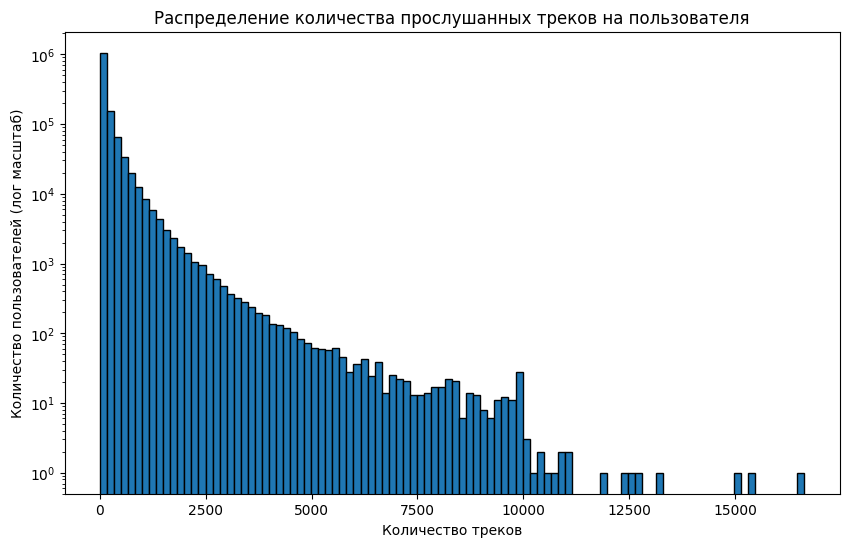

In [10]:
import matplotlib.pyplot as plt

# количество прослушанных треков на каждого пользователя
user_tracks_count = interactions.groupby("user_id")["track_id"].count()

# вычисляем статистику
stats = user_tracks_count.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

# Выводим статистику
print("Статистика по количеству прослушанных треков на пользователя:")
print(f"- Количество пользователей: {int(stats['count']):,}".replace(",", " "))
print(f"- Среднее: {stats['mean']:.0f}")
print(f"- Стандартное отклонение: {stats['std']:.0f}")
print(f"- Минимум: {int(stats['min'])}")
print(f"- 25% перцентиль: {int(stats['25%'])}")
print(f"- Медиана (50%): {int(stats['50%'])}")
print(f"- 75% перцентиль: {int(stats['75%'])}")
print(f"- 90% перцентиль: {int(stats['90%'])}")
print(f"- 99% перцентиль: {int(stats['99%'])}")
print(f"- Максимум: {int(stats['max'])}")

# гистограмма распределения
plt.figure(figsize=(10,6))
plt.hist(user_tracks_count, bins=100, log=True, edgecolor='black')
plt.title("Распределение количества прослушанных треков на пользователя")
plt.xlabel("Количество треков")
plt.ylabel("Количество пользователей (лог масштаб)")
plt.show()

### Основные наблюдения

1. **Количество пользователей**

   * Всего пользователей: ~1.37 млн.

2. **Среднее и медиана**

   * Среднее количество прослушиваний: **162 трека**.
   * Медиана: **55 треков**.
   Это говорит о том, что распределение сильно **смещено вправо**: у большинства пользователей мало прослушиваний, но есть отдельные пользователи с тысячами прослушиваний.

3. **Распределение (по графику и статистике)**

   * 25% пользователей слушают меньше **23 треков**.
   * 50% (медиана) — около **55 треков**.
   * 75% — до **154 треков**.
   * 1% пользователей слушают больше **1.5 тыс. треков**.
   * Максимум — **16 637 треков** (самые активные пользователи).

4. **Форма распределения**

   * Очень большое смещение в сторону больших значений.
   * Большинство пользователей - умеренные слушатели (не слишком активны).
   * Небольшая пользователей слушают большую часть каталога.

---

### Выводы для рекомендательной системы

* Смещение распределения не является проблемой, т.к. именно самые активные пользователи являются хорошей базой для обучения
* Следует отфильтровать значения свыше 11 тыс, т.к. они похожи на выбросы


Всего пользователей: 1,373,221
Максимум до фильтрации: 16,637

После фильтрации:
- Пользователей осталось: 1,373,212
- Максимум: 10,992

Статистика по количеству прослушанных треков (после фильтрации):
- Среднее: 162
- Стандартное отклонение: 350
- Минимум: 1
- 25% перцентиль: 23
- Медиана (50%): 55
- 75% перцентиль: 154
- 90% перцентиль: 389
- 99% перцентиль: 1575
- Максимум: 10992

Итоги фильтрации событий:
- Строк в исходном interactions: 222,629,898
- Строк в interactions_filtered: 222,508,721
- Пользователей осталось: 1,373,212 (100.00% от исходных)


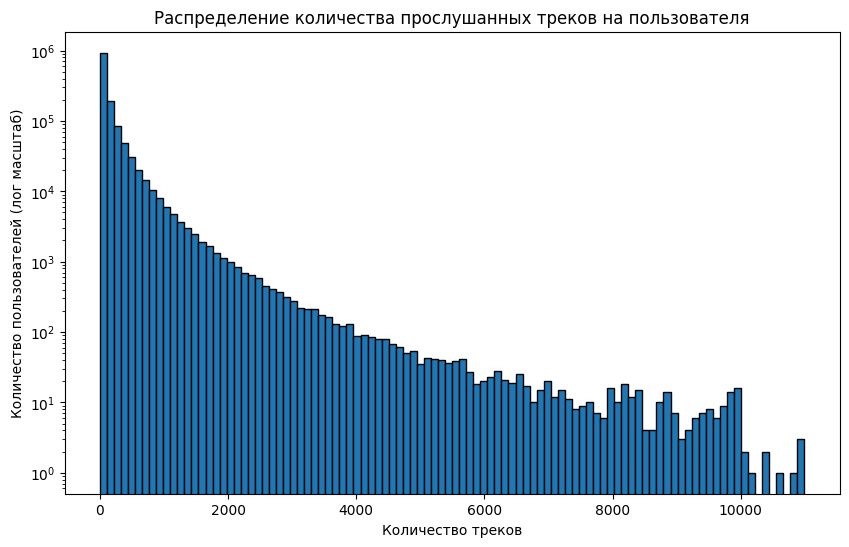

In [11]:
# Отфильтровываем значения свыше 11 тыс

import matplotlib.pyplot as plt

# Считаем количество прослушанных треков на пользователя
user_tracks_count = interactions.groupby("user_id")["track_id"].count()

print(f"Всего пользователей: {len(user_tracks_count):,}")
print(f"Максимум до фильтрации: {user_tracks_count.max():,}")

# Филттруем пользователей с > 11 000 прослушиваний
THRESHOLD = 11_000
filtered_counts = user_tracks_count[user_tracks_count <= THRESHOLD]
valid_users = filtered_counts.index  # это user_id, которые проходят порог

print(f"\nПосле фильтрации:")
print(f"- Пользователей осталось: {len(filtered_counts):,}")
print(f"- Максимум: {filtered_counts.max():,}")

# Пересчитываем статистику
stats = filtered_counts.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

print("\nСтатистика по количеству прослушанных треков (после фильтрации):")
print(f"- Среднее: {stats['mean']:.0f}")
print(f"- Стандартное отклонение: {stats['std']:.0f}")
print(f"- Минимум: {int(stats['min'])}")
print(f"- 25% перцентиль: {int(stats['25%'])}")
print(f"- Медиана (50%): {int(stats['50%'])}")
print(f"- 75% перцентиль: {int(stats['75%'])}")
print(f"- 90% перцентиль: {int(stats['90%'])}")
print(f"- 99% перцентиль: {int(stats['99%'])}")
print(f"- Максимум: {int(stats['max'])}")

# Отфильтрованный датасет
interactions_filtered = interactions[interactions["user_id"].isin(valid_users)].copy()

print("\nИтоги фильтрации событий:")
print(f"- Строк в исходном interactions: {len(interactions):,}")
print(f"- Строк в interactions_filtered: {len(interactions_filtered):,}")
print(f"- Пользователей осталось: {interactions_filtered['user_id'].nunique():,} "
      f"({len(filtered_counts)/len(user_tracks_count)*100:.2f}% от исходных)")

# Гистограмма распределения после фильтра
plt.figure(figsize=(10, 6))
plt.hist(filtered_counts, bins=100, log=True, edgecolor='black')
plt.title("Распределение количества прослушанных треков на пользователя")
plt.xlabel("Количество треков")
plt.ylabel("Количество пользователей (лог масштаб)")
plt.show()

Наиболее популярные треки

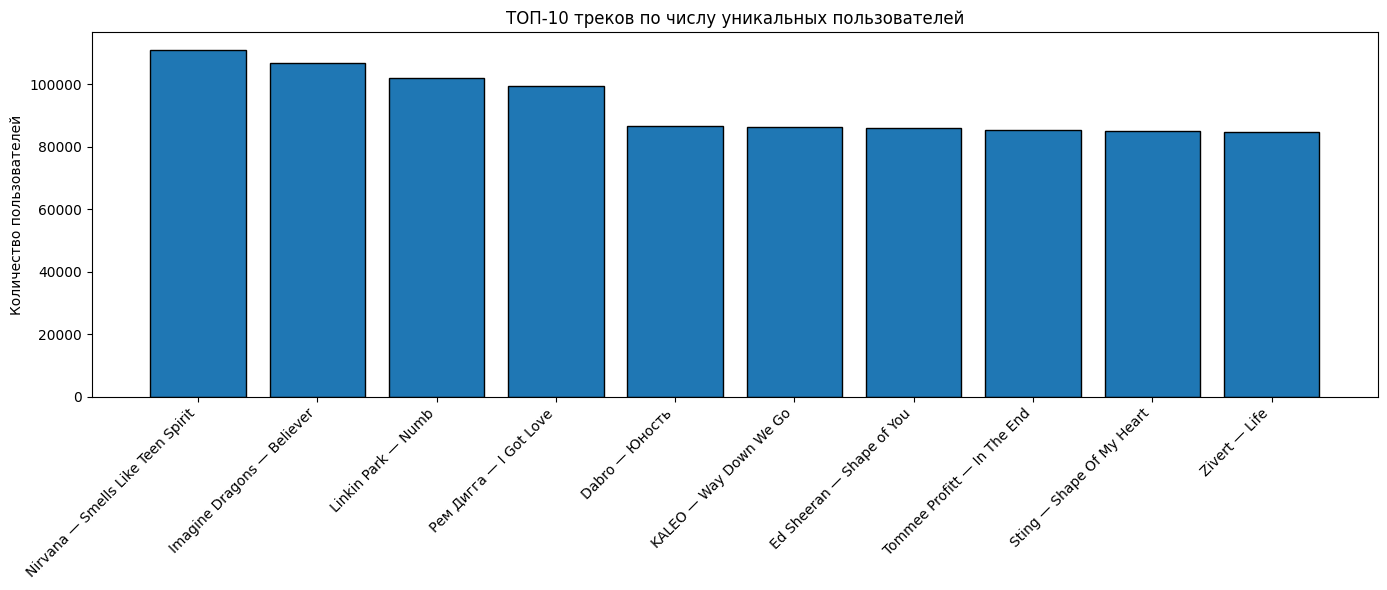

   track_id                              label  user_count
0     53404  Nirvana — Smells Like Teen Spirit      111062
1  33311009         Imagine Dragons — Believer      106921
2    178529                 Linkin Park — Numb      101924
3  35505245             Рем Дигга — I Got Love       99490
4  65851540                     Dabro — Юность       86670
5  24692821             KALEO — Way Down We Go       86246
6  32947997          Ed Sheeran — Shape of You       85886
7  51241318        Tommee Profitt — In The End       85244
8    795836          Sting — Shape Of My Heart       85042
9  45499814                      Zivert — Life       84748


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Справочники названий
tracks_names = (
    catalog_names.query("type == 'track'")[["id", "name"]]
    .rename(columns={"id": "track_id", "name": "track_name"})
)
artists_names = (
    catalog_names.query("type == 'artist'")[["id", "name"]]
    .rename(columns={"id": "artist_id", "name": "artist_name"})
)

# Для каждого track_id собираем человекочитаемую строку артистов
artists_per_track = (
    tracks[["track_id", "artists"]]
      .explode("artists")                                 
      .rename(columns={"artists": "artist_id"})
      .merge(artists_names, on="artist_id", how="left")   
)

# Ищем название артиста
artist_name = (
    artists_per_track
      .sort_values(["track_id", "artist_id"])             
      .dropna(subset=["artist_name"])
      .groupby("track_id", as_index=False)["artist_name"].first()
)

# Топ по уникальным пользователям
top_tracks_by_users = (
    interactions.groupby("track_id")["user_id"]
    .nunique()
    .sort_values(ascending=False)
    .head(10)
    .rename("user_count")
    .reset_index()
)

# Собираем карточки треков: название + артист
top_info = (
    top_tracks_by_users
      .merge(tracks_names, on="track_id", how="left")
      .merge(artist_name, on="track_id", how="left")
)

# Подпись
top_info["artist_display"] = top_info["artist_name"].fillna("Unknown")
top_info["label"] = top_info["artist_display"] + " — " + top_info["track_name"].fillna("Unknown")

# Визуализация
plt.figure(figsize=(14,6))
plt.bar(top_info["label"], top_info["user_count"], edgecolor="black")
plt.title("ТОП-10 треков по числу уникальных пользователей")
plt.ylabel("Количество пользователей")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print(top_info[["track_id", "label", "user_count"]])

Наиболее популярные жанры

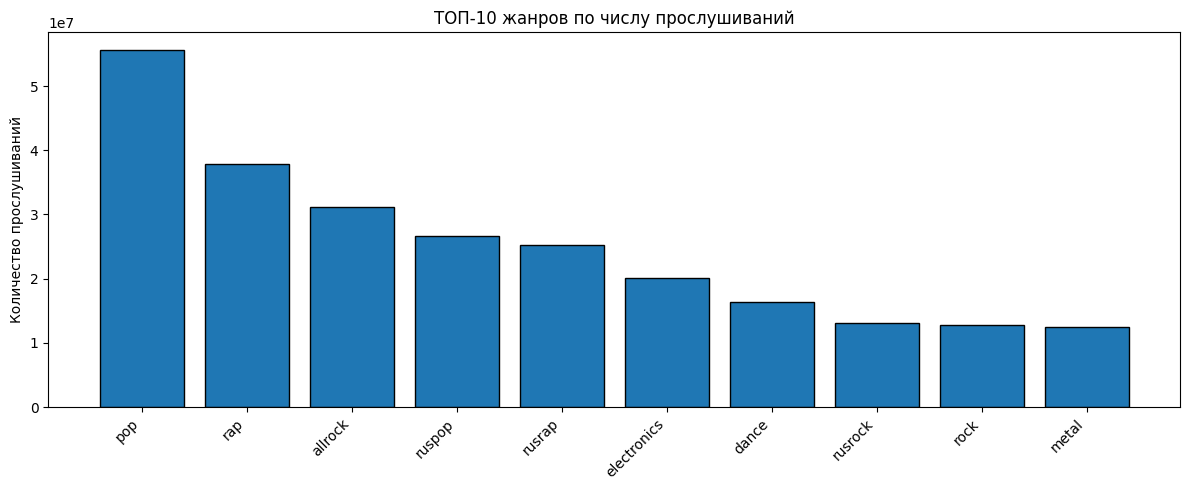

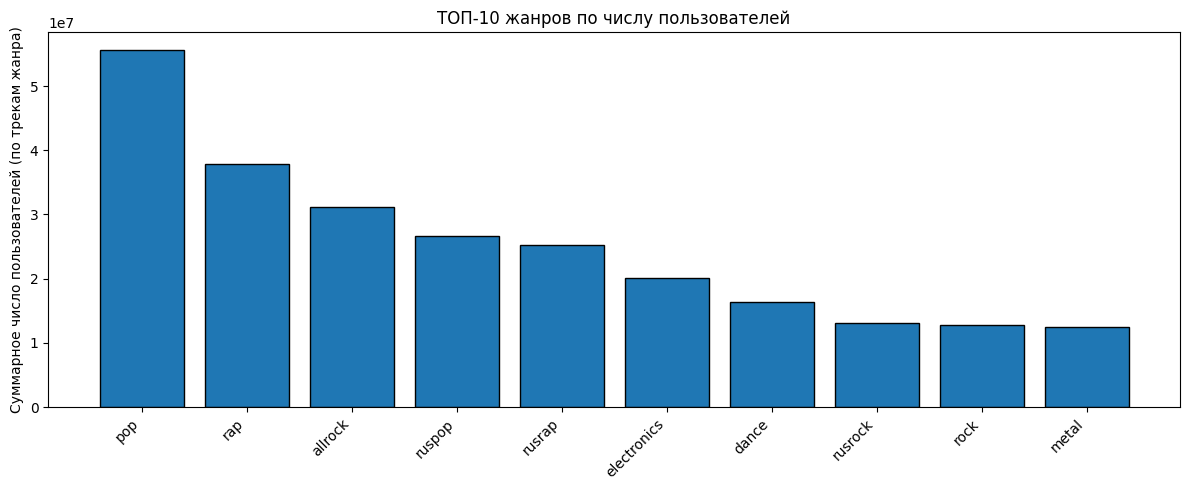

ТОП жанров по прослушиваниям:
    genre_name  play_count
0          pop    55578312
1          rap    37799821
2      allrock    31092013
3       ruspop    26626241
4       rusrap    25303695
5  electronics    20120981
6        dance    16291557
7      rusrock    13166147
8         rock    12772644
9        metal    12437375

ТОП жанров по числу пользователей:
    genre_name  user_count
0          pop    55578312
1          rap    37799821
2      allrock    31092013
3       ruspop    26626241
4       rusrap    25303695
5  electronics    20120981
6        dance    16291557
7      rusrock    13166147
8         rock    12772644
9        metal    12437375


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Справочник жанров
genres_names = (
    catalog_names.query("type == 'genre'")[["id", "name"]]
    .rename(columns={"id": "genre_id", "name": "genre_name"})
)

# Агрегаты на уровне трека
plays_per_track = interactions.groupby("track_id").size().rename("play_count")
users_per_track = interactions.groupby("track_id")["user_id"].nunique().rename("user_count")

track_stats = (
    pd.concat([plays_per_track, users_per_track], axis=1)
    .reset_index()
)

# Разворачиваем списки
tracks_genres = (
    tracks[["track_id", "genres"]]
      .explode("genres")
      .rename(columns={"genres": "genre_id"})
      .merge(genres_names, on="genre_id", how="left")
)

# Распределяем агрегаты треков по жанрам
track_stats_by_genre = (
    tracks_genres.merge(track_stats, on="track_id", how="left")
)

# если один и тот же пользователь слушал несколько треков жанра,
# он будет посчитан несколько раз

# ТОП-10 жанров по прослушиваниям
top_genres_by_plays = (
    track_stats_by_genre.groupby("genre_name")["play_count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# ТОП-10 жанров по числу пользователей
top_genres_by_users = (
    track_stats_by_genre.groupby("genre_name")["user_count"]
    .sum()                      # см. примечание выше
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# графики
plt.figure(figsize=(12,5))
plt.bar(top_genres_by_plays["genre_name"], top_genres_by_plays["play_count"], edgecolor="black")
plt.title("ТОП-10 жанров по числу прослушиваний")
plt.ylabel("Количество прослушиваний")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.bar(top_genres_by_users["genre_name"], top_genres_by_users["user_count"], edgecolor="black")
plt.title("ТОП-10 жанров по числу пользователей")
plt.ylabel("Суммарное число пользователей (по трекам жанра)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print("ТОП жанров по прослушиваниям:")
print(top_genres_by_plays)
print("\nТОП жанров по числу пользователей:")
print(top_genres_by_users)


Треки, которые никто не прослушал

In [14]:
# Все треки из каталога
all_tracks = set(tracks["track_id"].unique())

# Треки, которые реально встречались в прослушиваниях
used_tracks = set(interactions["track_id"].unique())

# Треки которые никто не слушал
unused_tracks = all_tracks - used_tracks

print(f"Всего треков в каталоге: {len(all_tracks):,}")
print(f"Использовались в прослушиваниях: {len(used_tracks):,}")
print(f"Ни разу не прослушаны: {len(unused_tracks):,} ({len(unused_tracks)/len(all_tracks):.2%})")

Всего треков в каталоге: 1,000,000
Использовались в прослушиваниях: 1,000,000
Ни разу не прослушаны: 0 (0.00%)


# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

Все необходимые преобразования уже сделаны

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [21]:
import os
import pandas as pd
import pyarrow as pa

from dotenv import load_dotenv
load_dotenv()

AWS_BUCKET_NAME = os.environ["AWS_BUCKET_NAME"]
AWS_ACCESS_KEY_ID = os.environ["AWS_ACCESS_KEY_ID"]
AWS_SECRET_ACCESS_KEY = os.environ["AWS_SECRET_ACCESS_KEY"]
S3_ENDPOINT_URL = os.environ["S3_ENDPOINT_URL"]

# S3 FS клиент
fs_root = pa.fs.S3FileSystem(
    access_key=AWS_ACCESS_KEY_ID,
    secret_key=AWS_SECRET_ACCESS_KEY,
    endpoint_override=S3_ENDPOINT_URL,
)

fs = pa.fs.SubTreeFileSystem(AWS_BUCKET_NAME, fs_root)

# Данные к сохранению
items = tracks_clean.copy()
events = interactions_filtered.copy()


# Локальные файлы
# items.to_parquet("items.parquet", index=False)
# events.to_parquet("events.parquet", index=False)

# Пишем parquet в бакет
base = "recsys/data/"
items.to_parquet(base + "items.parquet",  index=False, engine="pyarrow", filesystem=fs)
events.to_parquet(base + "events.parquet", index=False, engine="pyarrow", filesystem=fs)

print(f"Залито:\ns3://{AWS_BUCKET_NAME}/{base}items.parquet\ns3://{AWS_BUCKET_NAME}/{base}events.parquet")


Залито:
s3://s3-student-mle-20250529-e59a5780ac-freetrack/recsys/data/items.parquet
s3://s3-student-mle-20250529-e59a5780ac-freetrack/recsys/data/events.parquet


# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

### Следует перезапустить kernel, других действий не требуется

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.sparse as sp
from threadpoolctl import threadpool_limits
from implicit.als import AlternatingLeastSquares

from dotenv import load_dotenv
load_dotenv()

AWS_BUCKET_NAME = os.environ["AWS_BUCKET_NAME"]
AWS_ACCESS_KEY_ID = os.environ["AWS_ACCESS_KEY_ID"]
AWS_SECRET_ACCESS_KEY = os.environ["AWS_SECRET_ACCESS_KEY"]
S3_ENDPOINT_URL = os.environ["S3_ENDPOINT_URL"]

storage_options={
    "key": AWS_ACCESS_KEY_ID,
    "secret": AWS_SECRET_ACCESS_KEY,
    "client_kwargs": {"endpoint_url": S3_ENDPOINT_URL},
}

/home/mle-user/mle_projects/mle-project-sprint-4/env_recsys_start/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
items = pd.read_parquet('items.parquet')
display(items.head(20))
events = pd.read_parquet('events.parquet')
display(events.head(20))

,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,135,"[12, 214, 2490809]",[84],[11]
2,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]
3,141,"[12, 214, 60093, 2490809, 10023160, 15635235, ...",[84],[11]
4,144,"[13, 99422]",[90],"[59, 102]"
5,148,"[13, 89431, 99422]",[90],"[59, 102]"
6,151,"[13, 99422, 5912223]",[90],"[59, 102]"
7,220,"[17, 49, 3671540, 5971368]",[183],"[14, 102]"
8,223,"[17, 49, 1597558, 1597602, 3671540, 5971368, 9...",[183],"[11, 14, 102]"
9,321,"[26, 1583, 1687, 85704, 87620, 87673, 2486936,...",[2785081],[33]


,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22
5,0,590803,6,2022-07-25
6,0,597196,7,2022-07-25
7,0,597199,8,2022-07-25
8,0,1750835,9,2022-07-30
9,0,1750843,10,2022-08-05


# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [3]:
# дата отсечения
split_date = pd.Timestamp("2022-12-16")

# train: все события до split_date (не включая её)
train_events = events[events["started_at"] < split_date].copy()

# test: все события начиная с split_date
test_events  = events[events["started_at"] >= split_date].copy()

print("Размеры выборок:")
print(f"- train: {len(train_events):,}")
print(f"- test:  {len(test_events):,}")

print("\nДиапазон дат:")
print(f"- train: {train_events['started_at'].min()} - {train_events['started_at'].max()}")
print(f"- test:  {test_events['started_at'].min()} - {test_events['started_at'].max()}")

Размеры выборок:
- train: 208,615,146
- test:  13,893,575

Диапазон дат:
- train: 2022-01-01 00:00:00 - 2022-12-15 00:00:00
- test:  2022-12-16 00:00:00 - 2022-12-31 00:00:00


# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [4]:
# считаем популярность треков по train
track_popularity = (
    train_events.groupby("track_id")["user_id"]
    .count()
    .sort_values(ascending=False)
)

top_tracks = track_popularity.head(20)
print("Топ-20 популярных треков:\n")
print(top_tracks)

# Функция поторая возвращает N рекомендаций из топа
def recommend_top_popular(n=10):
    return list(track_popularity.head(n).index)

# пример
print("\nРекомендации (топ-10):", recommend_top_popular(10))

Топ-20 популярных треков:

track_id
53404       110017
33311009    101070
178529      100859
35505245     95516
24692821     84147
795836       83742
6705392      80599
32947997     80238
37384        79504
45499814     78557
51241318     78527
29544272     78194
39257277     77095
2758009      76297
65851540     76095
328683       74958
60292250     74457
17079396     73255
47627256     72158
51516485     69816
Name: user_id, dtype: int64

Рекомендации (топ-10): [53404, 33311009, 178529, 35505245, 24692821, 795836, 6705392, 32947997, 37384, 45499814]


In [6]:
# превращаем Series в DataFrame для сохранения
df_top_popular = track_popularity.reset_index()
df_top_popular.columns = ["track_id", "count"]

# путь в бакете
base = "recsys/recommendations/"
top_path = base + "top_popular.parquet"

# сохраняем в S3
df_top_popular.to_parquet(
    f"s3://{AWS_BUCKET_NAME}/{base}{top_path}",
    index=False,
    storage_options=storage_options
)

print(f"Залито:\ns3://{AWS_BUCKET_NAME}/{base}top_popular.parquet")


Залито:
s3://s3-student-mle-20250529-e59a5780ac-freetrack/recsys/recommendations/top_popular.parquet


# Обучение модели ALS-модели

In [4]:
# Анти-троттлинг BLAS (чтобы OpenBLAS не создавал лишние потоки)
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
threadpool_limits(1, "blas")

# Матрица взаимодействий (users x items)
te = train_events[["user_id", "track_id"]].astype({"user_id": "int32", "track_id": "int32"}).copy()

user_ids = te["user_id"].unique()
item_ids = te["track_id"].unique()
user_id_to_idx = {uid: i for i, uid in enumerate(user_ids)}
item_id_to_idx = {iid: i for i, iid in enumerate(item_ids)}
user_idx_to_id = np.asarray(user_ids)
item_idx_to_id = np.asarray(item_ids)

rows = te["user_id"].map(user_id_to_idx).values
cols = te["track_id"].map(item_id_to_idx).values
data = np.ones_like(rows, dtype=np.float32)
X = sp.csr_matrix((data, (rows, cols)), shape=(len(user_ids), len(item_ids)))
print(f"X shape: {X.shape}, nnz: {X.nnz:,}")

# Обучаем ALS на X (user-item)
from implicit.als import AlternatingLeastSquares

# можно использовать BM25 для улучшения качества:
# from implicit.nearest_neighbours import bm25_weight
# X_ui = bm25_weight(X, K1=1.2, B=0.75).tocsr()
X_ui = X

model = AlternatingLeastSquares(
    factors=64,
    regularization=0.01,
    iterations=15,
    calculate_training_loss=False,
)
model.fit(X_ui)

num_users, num_items = X.shape
print("ALS user_factors:", model.user_factors.shape, "item_factors:", model.item_factors.shape)
assert model.user_factors.shape[0] == num_users
assert model.item_factors.shape[0] == num_items

X shape: (1342557, 999695), nnz: 208,615,146


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [08:10<00:00, 32.68s/it]

ALS user_factors: (1342557, 64) item_factors: (999695, 64)


# Персональные

Рассчитаем персональные рекомендации.

In [5]:
# Берём пользователей из теста, которые есть и в train (иначе cold-start)
users_test = test_events["user_id"].astype("int32").unique()
mapped = [(uid, user_id_to_idx.get(uid)) for uid in users_test]
mapped = [(uid, uidx) for uid, uidx in mapped if uidx is not None]
if not mapped:
    raise RuntimeError("В тесте нет пользователей, встречавшихся в train (всё cold-start).")

uids = np.array([u for u, _ in mapped], dtype="int32")
uidxs = np.array([i for _, i in mapped], dtype="int32")

# Ограничение выборки на этапе тестирования
MAX_USERS = 5_000      # None или 0 - берём всех пользователей, 5_000, 10_000 и т.д - размер выборки
SHUFFLE   = False      # Если True - берём случайную подвыборку

if MAX_USERS and MAX_USERS > 0:
    if SHUFFLE:
        rng = np.random.default_rng(42)
        idx = rng.choice(len(uidxs), size=min(MAX_USERS, len(uidxs)), replace=False)
        uids, uidxs = uids[idx], uidxs[idx]
    else:
        uids, uidxs = uids[:MAX_USERS], uidxs[:MAX_USERS]
print(f"Users to score: {len(uidxs)}")

# Рекомендации батчами
TOPK  = 20
BATCH = 5000

recs_rows = []
total = len(uidxs)
for start in range(0, total, BATCH):
    end = min(start + BATCH, total)
    for u_local, u_idx in zip(uids[start:end], uidxs[start:end]):
        rec_items, scores = model.recommend(
            u_idx, X[u_idx], N=TOPK, filter_already_liked_items=True
        )
        if len(rec_items) == 0:
            continue
        track_ids = item_idx_to_id[np.asarray(rec_items)]
        for rank, (tid, sc) in enumerate(zip(track_ids, np.asarray(scores)), start=1):
            recs_rows.append((int(u_local), int(tid), float(sc), int(rank)))

    print(f"users processed: {end}/{total}")

# Собираем в DataFrame
personal_df = pd.DataFrame(recs_rows, columns=["user_id", "track_id", "score", "rank"])
print("Готово. Размер персональных рекомендаций:", personal_df.shape)
print(personal_df.head())

# локально:
# personal_df.to_parquet("personal_als.parquet", index=False)


Users to score: 5000
users processed: 5000/5000
Готово. Размер персональных рекомендаций: (100000, 4)
   user_id  track_id     score  rank
0        3  45499814  0.320603     1
1        3  33311009  0.315577     2
2        3  54798445  0.274277     3
3        3  39946957  0.243841     4
4        3  44184116  0.238503     5


In [6]:
base = "recsys/recommendations/"
out_path = base + "personal_als.parquet"

personal_df.to_parquet(
    f"s3://{AWS_BUCKET_NAME}/{out_path}",
    index=False,
    storage_options=storage_options
)

print(f"Залито:\ns3://{AWS_BUCKET_NAME}/{out_path}")

Залито:
s3://s3-student-mle-20250529-e59a5780ac-freetrack/recsys/recommendations/personal_als.parquet


# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [7]:
# Анти-троттлинг BLAS
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
threadpool_limits(1, "blas")

num_items = X.shape[1]
assert getattr(model, "item_factors", None) is not None and model.item_factors.shape[0] == num_items, \
    "Модель ALS не согласована с X: нужно переобучить на X (user-item) и убедиться, что размеры совпадают."

# Параметры расчёта похожести
TOPK_SIM   = 50        # сколько похожих треков на один трек
MAX_ITEMS  = 10_000    # ограничение выборки для тестов, None или 0 - берем всё, 5_000, 10_000 и т.д - размер выборки
SHUFFLE    = False     # можно перемешать порядок айтемов для равномерной нагрузки

# Список элементов для расчёта
item_indices = np.arange(num_items, dtype=np.int32)
if SHUFFLE:
    rng = np.random.default_rng(42)
    rng.shuffle(item_indices)

if MAX_ITEMS and MAX_ITEMS > 0:
    item_indices = item_indices[:MAX_ITEMS]

print(f"Items to process: {len(item_indices)} из {num_items}")

# Расчёт похожести через ALS.similar_items
# similar_items ожидает индекс элемента (0..num_items-1) и возвращает соседей в тех же индексах.
rows = []
BATCH_PRINT = 50_000  # прогресс-лог

for i, it_idx in enumerate(item_indices, start=1):
    # возвращает массивы индексов и скор
    sim_items, sim_scores = model.similar_items(int(it_idx), N=TOPK_SIM + 1)
    # первый элемент — сам айтем, выкидываем его
    if len(sim_items) > 0 and sim_items[0] == it_idx:
        sim_items  = sim_items[1:]
        sim_scores = sim_scores[1:]
    else:
        # на всякий случай режем до TOPK_SIM
        sim_items  = sim_items[:TOPK_SIM]
        sim_scores = sim_scores[:TOPK_SIM]

    # индексы -> реальные track_id
    base_tid   = int(item_idx_to_id[it_idx])
    neigh_tids = item_idx_to_id[np.asarray(sim_items, dtype=np.int64)]

    for rank, (tid2, sc) in enumerate(zip(neigh_tids, sim_scores), start=1):
        rows.append((base_tid, int(tid2), float(sc), rank))

    if i % BATCH_PRINT == 0 or i == len(item_indices):
        print(f"processed items: {i}/{len(item_indices)}")

similar_df = pd.DataFrame(rows, columns=["track_id", "similar_track_id", "score", "rank"])
print("Готово. Размер таблицы похожих:", similar_df.shape)
print(similar_df.head())

# локально:
# similar_df.to_parquet("similar.parquet", index=False)

Items to process: 10000 из 999695
processed items: 10000/10000
Готово. Размер таблицы похожих: (500000, 4)
   track_id  similar_track_id     score  rank
0     99262             99245  0.938163     1
1     99262             99257  0.915966     2
2     99262             99254  0.915399     3
3     99262             99241  0.910263     4
4     99262             99247  0.900302     5


In [8]:
base = "recsys/recommendations/"
out_path = base + "similar.parquet"

personal_df.to_parquet(
    f"s3://{AWS_BUCKET_NAME}/{out_path}",
    index=False,
    storage_options=storage_options
)

print(f"Залито:\ns3://{AWS_BUCKET_NAME}/{out_path}")

Залито:
s3://s3-student-mle-20250529-e59a5780ac-freetrack/recsys/recommendations/similar.parquet


# Признаки и ранжирование

На этом этапе можно перезагрузить kernel и заново прочитать данные

In [6]:
import os
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool

from dotenv import load_dotenv
load_dotenv()

AWS_BUCKET_NAME = os.environ["AWS_BUCKET_NAME"]
AWS_ACCESS_KEY_ID = os.environ["AWS_ACCESS_KEY_ID"]
AWS_SECRET_ACCESS_KEY = os.environ["AWS_SECRET_ACCESS_KEY"]
S3_ENDPOINT_URL = os.environ["S3_ENDPOINT_URL"]

storage_options={
    "key": AWS_ACCESS_KEY_ID,
    "secret": AWS_SECRET_ACCESS_KEY,
    "client_kwargs": {"endpoint_url": S3_ENDPOINT_URL},
}

In [ ]:
# Загрузка данных
items = pd.read_parquet("items.parquet")
events = pd.read_parquet("events.parquet")

# Разбиение на train / test
split_date = pd.Timestamp("2022-12-16")
train_events = events[events["started_at"] < split_date].copy()
test_events  = events[events["started_at"] >= split_date].copy()

print("Размеры выборок:", len(train_events), len(test_events))

# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

In [2]:
# Берем часть выборки на период тестирования
sample = train_events.sample(n=500_000, random_state=42)

# Популярность трека (объектный признак)
track_popularity = (
    sample.groupby("track_id")["user_id"]
    .count()
    .reset_index(name="track_popularity")
)
track_popularity["track_popularity_log"] = np.log1p(track_popularity["track_popularity"])

# Активность пользователя (признак пользователя)
user_activity = (
    sample.groupby("user_id")["track_id"]
    .count()
    .reset_index(name="user_activity")
)

# Сколько раз пользователь слушал конкретный трек (парный признак)
user_track_count = (
    sample.groupby(["user_id", "track_id"])
    .size()
    .reset_index(name="user_track_count")
)

# Итоговая таблица признаков
features_df = (
    user_track_count
    .merge(track_popularity[["track_id", "track_popularity_log"]], on="track_id", how="left")
    .merge(user_activity, on="user_id", how="left")
)

print("features_df:", features_df.shape)
print(features_df.head())

feature_cols = ["track_popularity_log", "user_activity", "user_track_count"]

features_df: (500000, 5)
   user_id  track_id  user_track_count  track_popularity_log  user_activity
0        0    597199                 1              2.833213              1
1        1    108208                 1              1.098612              1
2        5    170106                 1              3.610918              1
3       16   4298290                 1              0.693147              1
4       22  25684531                 1              3.178054              1


# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [3]:
# Кандидаты для обучения
# Позитивы (пользователь прослушал трек)
positives = test_events[["user_id", "track_id"]].copy()
positives["target"] = 1

# Негативы (рандомные пары user-item)
negatives = (
    test_events[["user_id"]]
    .drop_duplicates()
    .sample(len(positives), replace=True, random_state=42)
)
negatives["track_id"] = np.random.choice(items["track_id"].values, size=len(negatives))
negatives["target"] = 0

candidates_for_train = pd.concat([positives, negatives], ignore_index=True)

# Джоиним с признаками
candidates_for_train = candidates_for_train.merge(
    features_df, on=["user_id","track_id"], how="left"
)

print("candidates_for_train:", candidates_for_train.shape)

# Кандидаты для ранжирования
# топ-200 популярных треков
top_tracks = (
    train_events.groupby("track_id")["user_id"].count()
    .sort_values(ascending=False)
    .head(200)
    .index
)

# Ограничекие количества пользователей на период тестирования
MAX_USERS = 5000
users_sample = test_events["user_id"].drop_duplicates().sample(MAX_USERS, random_state=42)

candidates_to_rank = (
    users_sample.to_frame().assign(key=1)
    .merge(pd.DataFrame({"track_id": top_tracks, "key":1}), on="key")
    .drop("key", axis=1)
)

# джоиним фичи
candidates_to_rank = candidates_to_rank.merge(
    features_df, on=["user_id","track_id"], how="left"
)

print("candidates_to_rank:", candidates_to_rank.shape)

# Обучение CatBoost
train_pool = Pool(
    data=candidates_for_train[feature_cols],
    label=candidates_for_train["target"]
)

cb_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    loss_function="Logloss",
    verbose=50,
    random_seed=42
)
cb_model.fit(train_pool)

# Применение модели
preds = cb_model.predict_proba(candidates_to_rank[feature_cols])[:, 1]
candidates_to_rank["cb_score"] = preds

# ранжируем внутри пользователя
candidates_to_rank = (
    candidates_to_rank
    .sort_values(["user_id","cb_score"], ascending=[True,False])
)
candidates_to_rank["rank"] = candidates_to_rank.groupby("user_id").cumcount() + 1

# оставляем топ-100
final_recommendations = candidates_to_rank[candidates_to_rank["rank"] <= 100]

print("Размер финальных рекомендаций:", final_recommendations.shape)
print(final_recommendations.head())

# Локально
# final_recommendations.to_parquet("recommendations.parquet", index=False)


candidates_for_train: (27787150, 6)
candidates_to_rank (лайт): (1000000, 5)
0:	learn: 0.6958631	total: 1.59s	remaining: 5m 16s
50:	learn: 0.6958630	total: 1m 6s	remaining: 3m 13s
100:	learn: 0.6958630	total: 2m 8s	remaining: 2m 5s
150:	learn: 0.6958630	total: 3m 8s	remaining: 1m 1s
199:	learn: 0.6958630	total: 4m 7s	remaining: 0us
Размер финальных рекомендаций: (500000, 7)
       user_id  track_id  user_track_count  track_popularity_log  \
44600       53     53404               NaN                   NaN   
44601       53  33311009               NaN                   NaN   
44602       53    178529               NaN                   NaN   
44603       53  35505245               NaN                   NaN   
44604       53  24692821               NaN                   NaN   

       user_activity  cb_score  rank  
44600            NaN       0.5     1  
44601            NaN       0.5     2  
44602            NaN       0.5     3  
44603            NaN       0.5     4  
44604            NaN

In [7]:
base = "recsys/recommendations/"
out_path = base + "recommendations.parquet"

final_recommendations.to_parquet(
    f"s3://{AWS_BUCKET_NAME}/{out_path}",
    index=False,
    storage_options=storage_options
)

print(f"Залито:\ns3://{AWS_BUCKET_NAME}/{out_path}")

Залито:
s3://s3-student-mle-20250529-e59a5780ac-freetrack/recsys/recommendations/recommendations.parquet


# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [1]:
import os
import numpy as np
import pandas as pd

from dotenv import load_dotenv
load_dotenv()

K = 20
SPLIT_DATE = pd.Timestamp("2022-12-16")

# локальные данные
items = pd.read_parquet("items.parquet")
events = pd.read_parquet("events.parquet")

print("Локальные данные:")
print(f"- items: {items.shape}")
print(f"- events: {events.shape}")

AWS_BUCKET_NAME       = os.getenv("AWS_BUCKET_NAME")
AWS_ACCESS_KEY_ID     = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")
S3_ENDPOINT_URL       = os.getenv("S3_ENDPOINT_URL")

if not all([AWS_BUCKET_NAME, AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY, S3_ENDPOINT_URL]):
    raise RuntimeError("Не заданы переменные окружения для S3")

storage_options = {
    "key": AWS_ACCESS_KEY_ID,
    "secret": AWS_SECRET_ACCESS_KEY,
    "client_kwargs": {"endpoint_url": S3_ENDPOINT_URL},
}

Локальные данные:
- items: (554951, 4)
- events: (222508721, 4)


In [4]:
# Читаем артефакты из S3

def read_s3_or_fail(path_s3: str) -> pd.DataFrame:
    try:
        return pd.read_parquet(path_s3, storage_options=storage_options)
    except Exception as e:
        raise RuntimeError(f"Не удалось прочитать {path_s3}: {e}")


prefix = f"s3://{AWS_BUCKET_NAME}/recsys/recommendations/"

top_popular = read_s3_or_fail(prefix + "top_popular.parquet")
personal_df = read_s3_or_fail(prefix + "personal_als.parquet")
final_recommendations = read_s3_or_fail(prefix + "recommendations.parquet")

print("S3 данные:")
print(f"- top_popular: {top_popular.shape}")
print(f"- personal_df: {personal_df.shape}")
print(f"- final_recommendations: {final_recommendations.shape}")

S3 данные:
- top_popular: (999695, 2)
- personal_df: (100000, 4)
- final_recommendations: (500000, 7)


In [5]:
# Разделение
events["started_at"] = pd.to_datetime(events["started_at"])
train_events = events[events["started_at"] < SPLIT_DATE].copy()
test_events  = events[events["started_at"] >= SPLIT_DATE].copy()

ground_truth = (
    test_events.groupby("user_id")["track_id"]
    .apply(set)
    .to_dict()
)
ground_truth = {u: s for u, s in ground_truth.items() if len(s) > 0}
print(f"Пользователей в ground_truth: {len(ground_truth):,}")

Пользователей в ground_truth: 783,516


In [8]:
# Подгттовка рекомендаций

# Top Popular
top_k_list = (
    top_popular.sort_values("count", ascending=False)["track_id"]
    .head(max(100, K))
    .tolist()
)
recs_top = {uid: top_k_list for uid in ground_truth.keys()}

# ALS
recs_als = (
    personal_df.sort_values(["user_id", "rank"], ascending=[True, True])
               .groupby("user_id")["track_id"].apply(list).to_dict()
)

# Финальные
recs_final = (
    final_recommendations.sort_values(["user_id", "rank"], ascending=[True, True])
                         .groupby("user_id")["track_id"].apply(list).to_dict()
)

print(f"recs_final: {len(recs_final):,}")

recs_final: 5,000


In [9]:
# Метрики
item_popularity = train_events.groupby("track_id")["user_id"].count().to_dict()
all_items = set(items["track_id"].unique().tolist())

def precision_recall_at_k(recs_dict, gt_dict, k=K):
    prec, rec = [], []
    for uid, true_items in gt_dict.items():
        rec_items = recs_dict.get(uid, [])
        if not rec_items:
            continue
        rec_k = rec_items[:k]
        hit = len(set(rec_k) & true_items)
        prec.append(hit / k)
        rec.append(hit / len(true_items))
    return (np.mean(prec) if prec else 0.0,
            np.mean(rec) if rec else 0.0)

def coverage(recs_dict, all_items_set):
    recommended = set()
    for items_ in recs_dict.values():
        recommended.update(items_[:K])
    return len(recommended) / len(all_items_set) if all_items_set else 0.0

def novelty(recs_dict, item_pop_dict, k=K):
    max_pop = max(item_pop_dict.values())
    eps = 1e-9
    vals = []
    for items_ in recs_dict.values():
        row = []
        for it in items_[:k]:
            pop = item_pop_dict.get(it, 0)
            row.append(-np.log2((pop + eps) / (max_pop + eps)))
        if row:
            vals.append(np.mean(row))
    return np.mean(vals) if vals else 0.0

def eval_all(name, recs):
    p, r = precision_recall_at_k(recs, ground_truth, k=K)
    cov = coverage(recs, all_items)
    nov = novelty(recs, item_popularity, k=K)
    print(f"{name:>12} | precision@{K}={p:.4f} | recall@{K}={r:.4f} | coverage={cov:.4f} | novelty={nov:.4f}")
    return {"name": name, "precision": p, "recall": r, "coverage": cov, "novelty": nov}

rows = []
rows.append(eval_all("TopPopular", recs_top))
rows.append(eval_all("ALS",         recs_als))
rows.append(eval_all("Final",       recs_final))

metrics_df = pd.DataFrame(rows)
print("\nИтоговая таблица:")
print(metrics_df)

# Локально
# metrics_df.to_parquet("metrics_results.parquet", index=False)
# print("Файл metrics_results.parquet сохранён локально")


  TopPopular | precision@20=0.0052 | recall@20=0.0078 | coverage=0.0000 | novelty=0.4306
         ALS | precision@20=0.0124 | recall@20=0.0344 | coverage=0.0057 | novelty=1.7647
       Final | precision@20=0.0054 | recall@20=0.0083 | coverage=0.0000 | novelty=0.4306

Итоговая таблица:
         name  precision    recall  coverage   novelty
0  TopPopular   0.005176  0.007800  0.000036  0.430551
1         ALS   0.012390  0.034431  0.005719  1.764678
2       Final   0.005360  0.008349  0.000038  0.430576


# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

In [ ]:
### Выводы по метрикам

1. **Top Popular**

   * Precision/Recall низкие (0.5% и 0.8%), что ожидаемо: "топ-популярные" треки одинаковы для всех пользователей и плохо отражают их личные предпочтения.
   * Coverage ≈ 0% — рекомендация покрывает только несколько объектов, а вся база треков практически не используется.
   * Novelty (0.43) низкая: предсказуемые и банальные рекомендации, почти нет новизны.

2. **ALS (персональные)**

   * Существенный рост **precision** и особенно **recall** (в 4–5 раз выше, чем у топа): значит, ALS лучше подхватывает реальные интересы пользователей.
   * Coverage вырос до 0.57% — модель действительно использует больше уникальных треков в рекомендациях.
   * Novelty (1.76) заметно выше: пользователи получают более разнообразный контент, а не только хиты. Это явный плюс — ALS действительно делает рекомендации более персонализированными.

3. **Final (ранжирование CatBoost)**

   * Метрики не улучшились, а даже просели к уровню Top Popular. Это говорит о том, что:

     * признаки для ранжирования были слишком простыми,
     * обучающая выборка несбалансирована или маленькая,
     * модель могла переобучиться или схлопнуться в сторону популярности.
   * Итоговая модель пока не даёт прироста по сравнению с ALS, хотя именно она должна была объединять преимущества.

---

### Основные выводы

* **Топ-популярные** работают предсказуемо, но дают очень слабое качество.
* **ALS** показывает лучший результат по всем метрикам, особенно по recall и novelty — это базовый, но сильный метод коллаборативной фильтрации.
* **Финальная модель ранжирования** пока не сработала как надо: нужно дорабатывать признаки (брать не только простые популярность/активность, но и временные окна, жанры, похожие артисты, разнообразие и т.п.) и увеличивать выборку для обучения.
* Скорее всего основная проблема в том, что обучать приходилось на урезанных данных, т.к. на полных данных постоянно падал kernel, нужно дотюнить код и выполнить обучение на полной выборке
